In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

In [3]:
print("Dataframe shape:", data.shape)

Dataframe shape: (9134, 24)


In [4]:
print(data)

     Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor           2/24/11         Employed 

In [5]:
data.columns = data.columns.str.lower().str.replace(' ', '_')

In [6]:
print(data)

     customer       state  customer_lifetime_value response  coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     education effective_to_date employmentstatus gender  income  ...  \
0     Bachelor           2/24/11         Employed 

In [7]:
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical columns:", num_cols)

Numerical columns: ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount']


In [8]:
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", cat_cols)

Categorical columns: ['customer', 'state', 'response', 'coverage', 'education', 'effective_to_date', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size']


In [9]:
null_counts = data.isnull().sum()
print("Null values:\n", null_counts)

Null values:
 customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64


In [10]:
print(data['effective_to_date'].head(50))

0     2/24/11
1     1/31/11
2     2/19/11
3     1/20/11
4      2/3/11
5     1/25/11
6     2/24/11
7     1/18/11
8     1/26/11
9     2/17/11
10    2/21/11
11     1/6/11
12     2/6/11
13    1/10/11
14    1/18/11
15    1/17/11
16     2/6/11
17     1/5/11
18    2/27/11
19    1/14/11
20    2/19/11
21    1/21/11
22    1/26/11
23    2/24/11
24     2/5/11
25    1/29/11
26    2/28/11
27    2/12/11
28     2/2/11
29     2/7/11
30    2/28/11
31    1/22/11
32    1/25/11
33    1/18/11
34    2/13/11
35    1/15/11
36     1/8/11
37     2/6/11
38    1/25/11
39     2/7/11
40    1/18/11
41    1/11/11
42    1/28/11
43     2/8/11
44    2/23/11
45    1/25/11
46    1/31/11
47     1/2/11
48     2/7/11
49    1/18/11
Name: effective_to_date, dtype: object


In [11]:
data['month'] = pd.DatetimeIndex(data['effective_to_date']).month

In [12]:
q1_data = data[data['month'].isin([1,2,3])]

In [13]:
print(q1_data.head(14))

   customer       state  customer_lifetime_value response  coverage  \
0   BU79786  Washington              2763.519279       No     Basic   
1   QZ44356     Arizona              6979.535903       No  Extended   
2   AI49188      Nevada             12887.431650       No   Premium   
3   WW63253  California              7645.861827       No     Basic   
4   HB64268  Washington              2813.692575       No     Basic   
5   OC83172      Oregon              8256.297800      Yes     Basic   
6   XZ87318      Oregon              5380.898636      Yes     Basic   
7   CF85061     Arizona              7216.100311       No   Premium   
8   DY87989      Oregon             24127.504020      Yes     Basic   
9   BQ94931      Oregon              7388.178085       No  Extended   
10  SX51350  California              4738.992022       No     Basic   
11  VQ65197  California              8197.197078       No     Basic   
12  DP39365  California              8798.797003       No   Premium   
13  SJ

In [14]:
def transform_data(df):
    # Standardizar nombres de las columnas
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    # Identificar columnas numéricas
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    # Identificar columnas categóricas
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()

    # Verificar valores nulos y tratarlos si existen
    null_counts = df.isnull().sum()
    if null_counts.sum() > 0:
        df = df.dropna()
        print("Null values treated.")

    # Extraer meses de la columna de fecha y almacenarlos en una columna separada
    df['month'] = pd.DatetimeIndex(df['effective_to_date']).month

    # Filtrar datos solo para el primer trimestre (enero, febrero, marzo)
    q1_data = df[df['month'].isin([1,2,3])]

    return q1_data

In [15]:
print (transform_data)

<function transform_data at 0x00000205BD3AA790>


In [16]:
import matplotlib.pyplot as plt


In [17]:
df = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [19]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


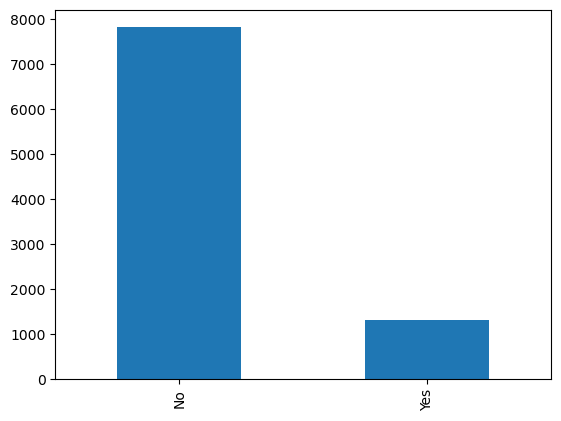

In [20]:
response_counts = df['Response'].value_counts()
response_counts.plot.bar()
plt.show()

In [21]:
df['Response'] = df['Response'].map({'Yes': 1, 'No': 0})

In [22]:
df = df.rename(columns={'Sales Channel': 'Sales_Channel'})

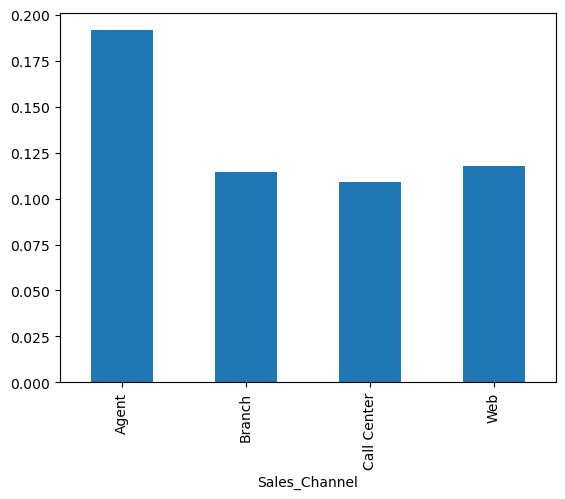

In [23]:
response_by_channel = df.groupby('Sales_Channel')['Response'].mean()
response_by_channel.plot.bar()
plt.show()

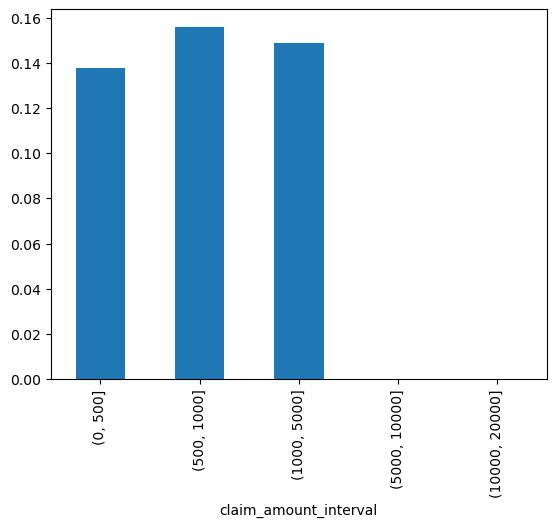

In [24]:
df['claim_amount_interval'] = pd.cut(df['Total Claim Amount'], bins=[0, 500, 1000, 5000, 10000, 20000])
response_by_claim_amount = df.groupby('claim_amount_interval')['Response'].mean()
response_by_claim_amount.plot.bar()
plt.show()

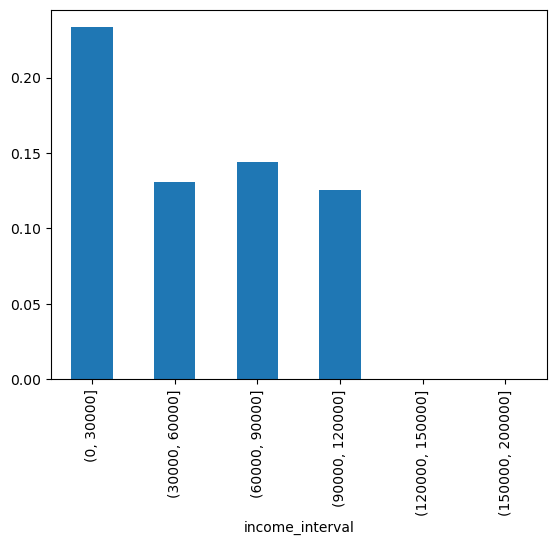

In [25]:
df['income_interval'] = pd.cut(df['Income'], bins=[0, 30000, 60000, 90000, 120000, 150000, 200000])
response_by_income = df.groupby('income_interval')['Response'].mean()
response_by_income.plot.bar()
plt.show()

In [26]:
import seaborn as sns


In [27]:
data = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

In [28]:
numerical = data.select_dtypes(include=np.number)

In [29]:
categoricals = data.select_dtypes(include='object')


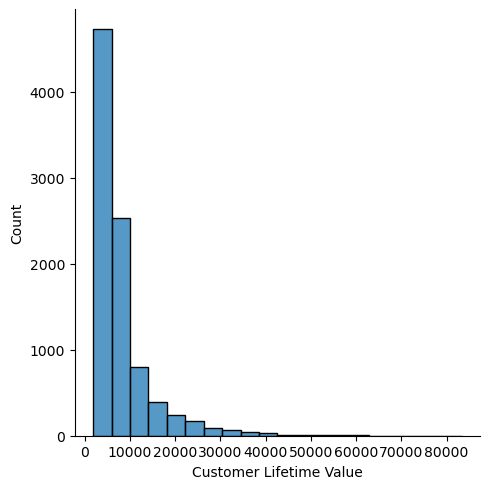

In [30]:
sns.displot(numerical['Customer Lifetime Value'], bins=20)
plt.show()


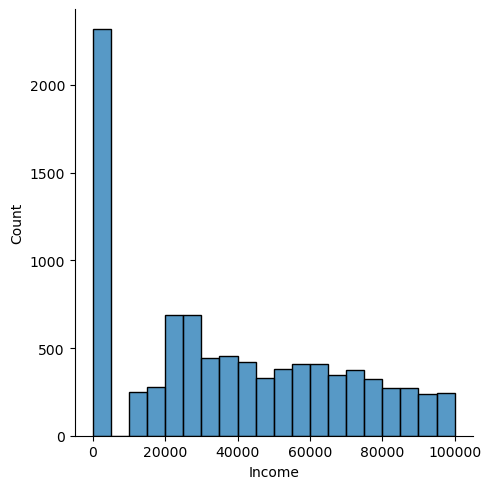

In [31]:

sns.displot(numerical['Income'], bins=20)
plt.show()

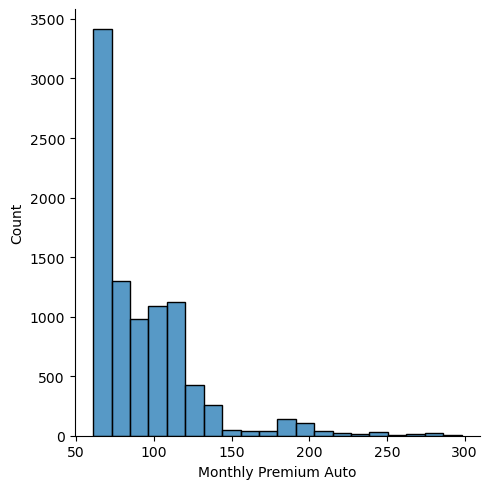

In [32]:
sns.displot(numerical['Monthly Premium Auto'], bins=20)
plt.show()

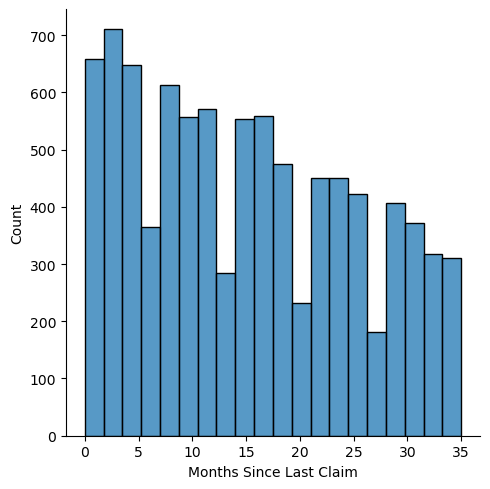

In [33]:
sns.displot(numerical['Months Since Last Claim'], bins=20)
plt.show()

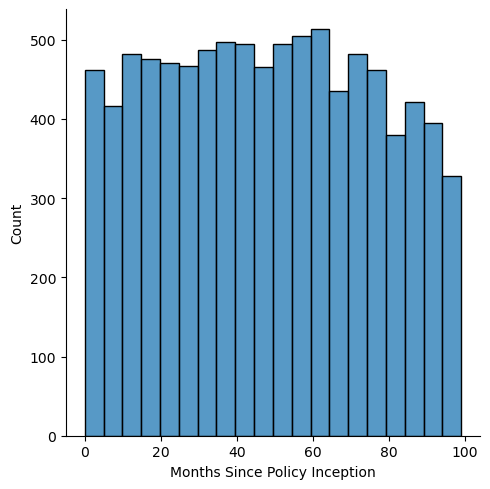

In [34]:
sns.displot(numerical['Months Since Policy Inception'], bins=20)
plt.show()


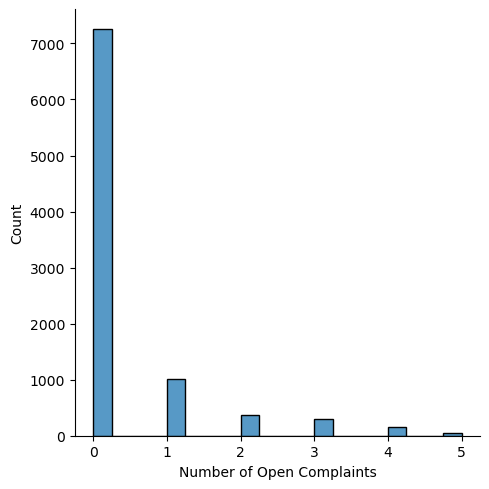

In [35]:
sns.displot(numerical['Number of Open Complaints'], bins=20)
plt.show()


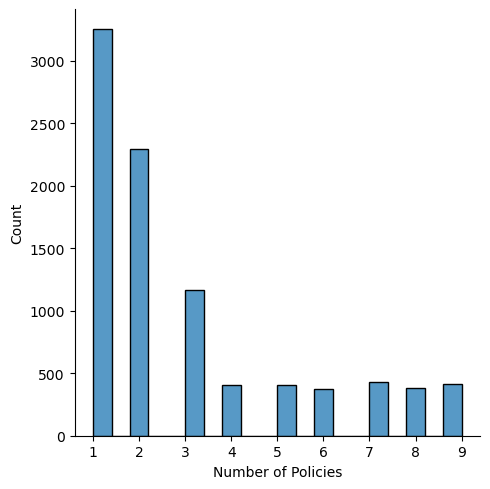

In [36]:
sns.displot(numerical['Number of Policies'], bins=20)
plt.show()


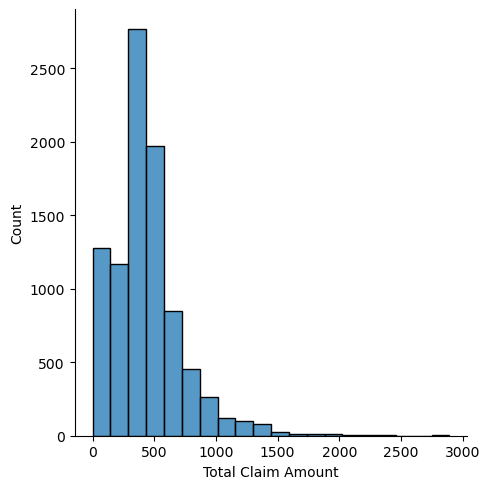

In [37]:
sns.displot(numerical['Total Claim Amount'], bins=20)
plt.show()

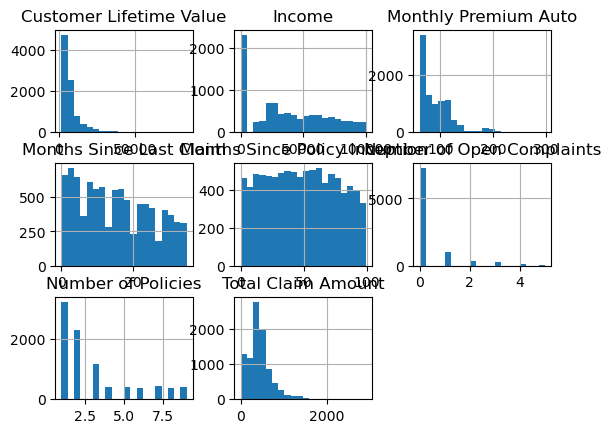

In [38]:
numerical.hist(bins=20)
plt.show()

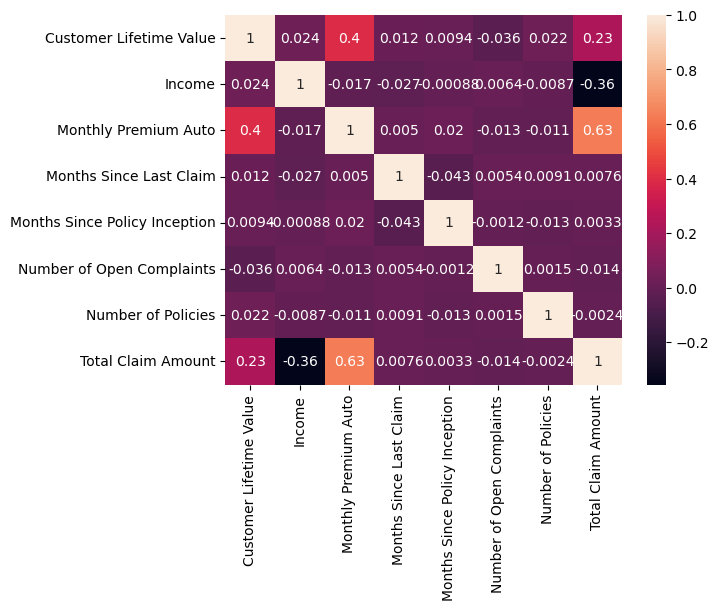

In [39]:
corr_matrix = numerical.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [40]:
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

In [41]:
y = data['Total Claim Amount']
X = data.drop(['Total Claim Amount'], axis=1)

In [42]:
numerical = X.select_dtypes(include=np.number)
scaler = StandardScaler()
scaler.fit(numerical)
X_scaled = scaler.transform(numerical)
X_scaled = pd.DataFrame(X_scaled, columns=numerical.columns)

In [43]:
print(X_scaled)

      Customer Lifetime Value    Income  Monthly Premium Auto  \
0                   -0.762878  0.612827             -0.703925   
1                   -0.149245 -1.239617              0.022691   
2                    0.710636  0.365710              0.429596   
3                   -0.052263 -1.239617              0.371467   
4                   -0.755575  0.203390             -0.587666   
...                       ...       ...                   ...   
9129                 2.241590  1.128558             -0.587666   
9130                -0.714411 -0.528450             -0.413278   
9131                 0.023135 -1.239617             -0.238891   
9132                -0.069935 -0.517356              0.080820   
9133                -0.784955 -1.239617             -0.471408   

      Months Since Last Claim  Months Since Policy Inception  \
0                    1.678099                      -1.543287   
1                   -0.208186                      -0.217334   
2                    0.2882

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
%matplotlib inline

In [45]:
data = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')


In [46]:
numerical = data.select_dtypes(include=np.number)
categoricals = data.select_dtypes(include=object)

In [47]:
transformer = StandardScaler().fit(numerical)
x_normalized = transformer.transform(numerical)
x_normalized = pd.DataFrame(x_normalized, columns=numerical.columns)

In [48]:
categoricals = pd.get_dummies(categoricals, drop_first=True)


In [49]:
X = pd.concat([x_normalized, categoricals], axis=1)
y = numerical['Total Claim Amount']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [51]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [52]:
predictions = lm.predict(X_test)
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)

print("R-squared: ", r2)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)

R-squared:  0.999998931588854
MSE:  0.0852955509718643
RMSE:  0.2920540206397856
MAE:  0.16257176227018286
